In [39]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from tcraligner.alignment_functions import HashedAln

### 1. String length

In [4]:
# String length 5, allowing 1 mismatch 
str_var1 = list("AACGT")
queries = []
for i in range(len(str_var1)) :
    new_list = str_var1.copy()
    choices = ['A', 'C','G','T']
    choices.remove(new_list[i])
    new_list[i] = np.random.choice(choices)
    new_string = ''.join(new_list)
    queries.append(new_string)
queries

['CACGT', 'ATCGT', 'AAGGT', 'AACCT', 'AACGA']

In [5]:
# generating 10 random mutations with 2 mismatches
str_var1 = list("AACGT")
queries2 = []
for i in range(3):
    mut_pos = np.random.choice(len(str_var1), 2, replace=False)
    print(mut_pos)
    new_list = str_var1.copy()
    
    for j in mut_pos:
        choices = ['A','C','G','T']
        choices.remove(new_list[j])
        new_list[j] = np.random.choice(choices)
    new_string = ''.join(new_list)
    queries2.append(new_string)
queries2

[2 0]
[1 2]
[2 0]


['CAGGT', 'ATAGT', 'GATGT']

In [78]:
def generate_mismatches(ref_string_length, num_mismatches=1, num_desired_seq=10):

    ref_seqs = []
    returned_strings = []
    for i in range(num_desired_seq):
        choices = ['A','C','G','T']
        ref_list = np.random.choice(choices, ref_string_length)
        ref_seqs.append(''.join(ref_list))
        mut_pos = np.random.choice(len(ref_list), num_mismatches, replace=False)
        new_list = ref_list.copy()
    
        for j in mut_pos:
            choices = ['A','C','G','T']
            choices.remove(new_list[j])
            new_list[j] = np.random.choice(choices)
        new_string = ''.join(new_list)
        returned_strings.append(new_string)
    clones = pd.DataFrame({'ref_seq': ref_seqs, 'query_seq': returned_strings})
    return clones

### Number of query seq 100, with varied string length and number of mismatches

In [36]:
choices = ['A','C','G','T']
ref_list = np.random.choice(choices, 5)
ref_string = ''.join(ref_list)

array(['G', 'C', 'T', 'A', 'C'], dtype='<U1')

In [74]:
# Generate strings of length 5
len5_mis1 = generate_mismatches(5, 1, 500)
len5_mis2 = generate_mismatches(5, 2, 500)
len5_mis3 = generate_mismatches(5, 3, 500)

In [75]:
# Generate strings of length 10

len10_mis1 = generate_mismatches(10, 1, 500)
len10_mis2 = generate_mismatches(10, 2, 500)
len10_mis3 = generate_mismatches(10, 3, 500)

# Generate strings of length 20

len20_mis1 = generate_mismatches(20, 1, 500)
len20_mis2 = generate_mismatches(20, 2, 500)
len20_mis3 = generate_mismatches(20, 3, 500)

# Generate strings of length 40
# ref_list40 = np.random.choice(choices, 40)
# ref_string40 = ''.join(ref_list40)
# print(ref_string40)
len40_mis1 = generate_mismatches(40, 1, 500)
len40_mis2 = generate_mismatches(40, 2, 500)
len40_mis3 = generate_mismatches(40, 3, 500)

# Generate strings of length 80

len80_mis0 = generate_mismatches(80, 0, 500)
len80_mis1 = generate_mismatches(80, 1, 500)
len80_mis2 = generate_mismatches(80, 2, 500)
len80_mis3 = generate_mismatches(80, 3, 500)
len80_mis4 = generate_mismatches(80, 4, 500)
len80_mis8 = generate_mismatches(80, 8, 500)

### Generating same mismatches for amino acids

In [60]:
def calculate_time(df):
    #results_df = pd.DataFrame(columns = ['query_pattern', 'time_s'])
    alnr = HashedAln(df.ref_seq, df.index, 3)
    alnr.build_index()
    start = time.time()
    res = alnr.align_clones(df.query_seq)
    runtime = time.time()-start
    return runtime

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done


(12.0, 16.0)

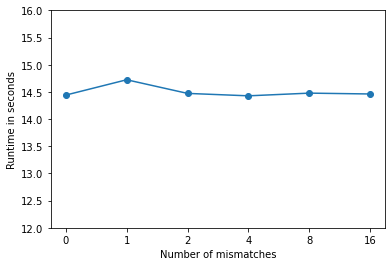

In [86]:
# Testing time with differing number of matches
len80_mis0 = generate_mismatches(80, 0, 500)
len80_mis1 = generate_mismatches(80, 1, 500)
len80_mis2 = generate_mismatches(80, 2, 500)
len80_mis3 = generate_mismatches(80, 3, 500)
len80_mis4 = generate_mismatches(80, 4, 500)
len80_mis8 = generate_mismatches(80, 8, 500)
len80_mis16 = generate_mismatches(80, 16, 500)

mismatches = pd.DataFrame(columns = ['mismatches', 'time_s'])
mismatches.loc[0] = 'mismatch_0', calculate_time(len80_mis0)
mismatches.loc[1] = 'mismatch_1', calculate_time(len80_mis1)
mismatches.loc[2] = 'mismatch_2', calculate_time(len80_mis2)
mismatches.loc[3] = 'mismatch_4', calculate_time(len80_mis4)
mismatches.loc[4] = 'mismatch_8', calculate_time(len80_mis8)
mismatches.loc[5] = 'mismatch_16', calculate_time(len80_mis16)



plt.plot(mismatches.time_s, marker = 'o')
plt.xticks([0,1,2,3,4,5], labels=[0,1,2,4,8,16])
plt.xlabel('Number of mismatches')
plt.ylabel('Runtime in seconds')
plt.ylim(1, 15)
plt.ylim(10, 20)
plt.savefig()

(10.0, 20.0)

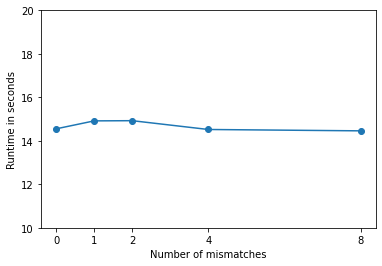

In [83]:

plt.plot(mismatches.time_s, marker = 'o')
plt.xticks([0,1,2,4,8])
plt.xlabel('Number of mismatches')
plt.ylabel('Runtime in seconds')
plt.ylim(10, 20)

In [ ]:
results_df = pd.DataFrame(columns = ['query_pattern', 'time_s'])
results_df.loc[0] = 'length_5', calculate_time(len5_mis1)
results_df.loc[1] = 'length_10', calculate_time(len10_mis1)
results_df.loc[2] = 'length_20', calculate_time(len20_mis1)
results_df.loc[3] = 'length_40', calculate_time(len40_mis1)
results_df.loc[4] = 'length_80', calculate_time(len80_mis1)


In [62]:
results_df2 = pd.DataFrame(columns = ['query_pattern', 'time_s'])
results_df2.loc[0] = 'mis2_length_5', calculate_time(len5_mis2)
results_df2.loc[1] = 'mis2_length_10', calculate_time(len10_mis2)
results_df2.loc[2] = 'mis2_length_20', calculate_time(len20_mis2)
results_df2.loc[3] = 'mis2_length_40', calculate_time(len40_mis2)
results_df2.loc[4] = 'mis2_length_80', calculate_time(len80_mis2)
results_df2

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done


,query_pattern,time_s
0,mis2_length_5,0.642049
1,mis2_length_10,2.545990
2,mis2_length_20,3.758566
3,mis2_length_40,10.749276
4,mis2_length_80,23.728556


In [63]:
results_df3 = pd.DataFrame(columns = ['query_pattern', 'time_s'])
results_df3.loc[0] = 'mis3_length_5', calculate_time(len5_mis2)
results_df3.loc[1] = 'mis3_length_10', calculate_time(len10_mis2)
results_df3.loc[2] = 'mis3_length_20', calculate_time(len20_mis2)
results_df3.loc[3] = 'mis3_length_40', calculate_time(len40_mis2)
results_df3.loc[4] = 'mis3_length_80', calculate_time(len80_mis2)

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done


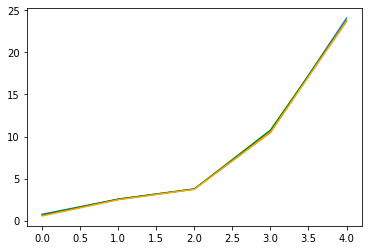

In [64]:
plt.plot(results_df.time_s)
plt.plot(results_df2.time_s, color = 'green')
plt.plot(results_df3.time_s, color = 'orange')

In [48]:
results_df[5:].time_s

5     0.025510
6     0.110036
7     0.154133
8     0.423380
10    0.972778
Name: time_s, dtype: float64